<a href="https://colab.research.google.com/github/PawanBhatt28/gdscAssignmentFinalModel/blob/master/GDSC_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.datasets import load_boston
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Dataset Import

In [ ]:
d = pd.read_csv("train1.csv")
data2 = pd.DataFrame(data=d)
data2.rename(columns = {'UNDER_CONSTRUCTION':'UC', 'READY_TO_MOVE':'RTM','TARGET(PRICE_IN_LACS)':'TARGET'}, inplace = True)

In [ ]:
data2.head()

,POSTED_BY,UC,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RTM,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


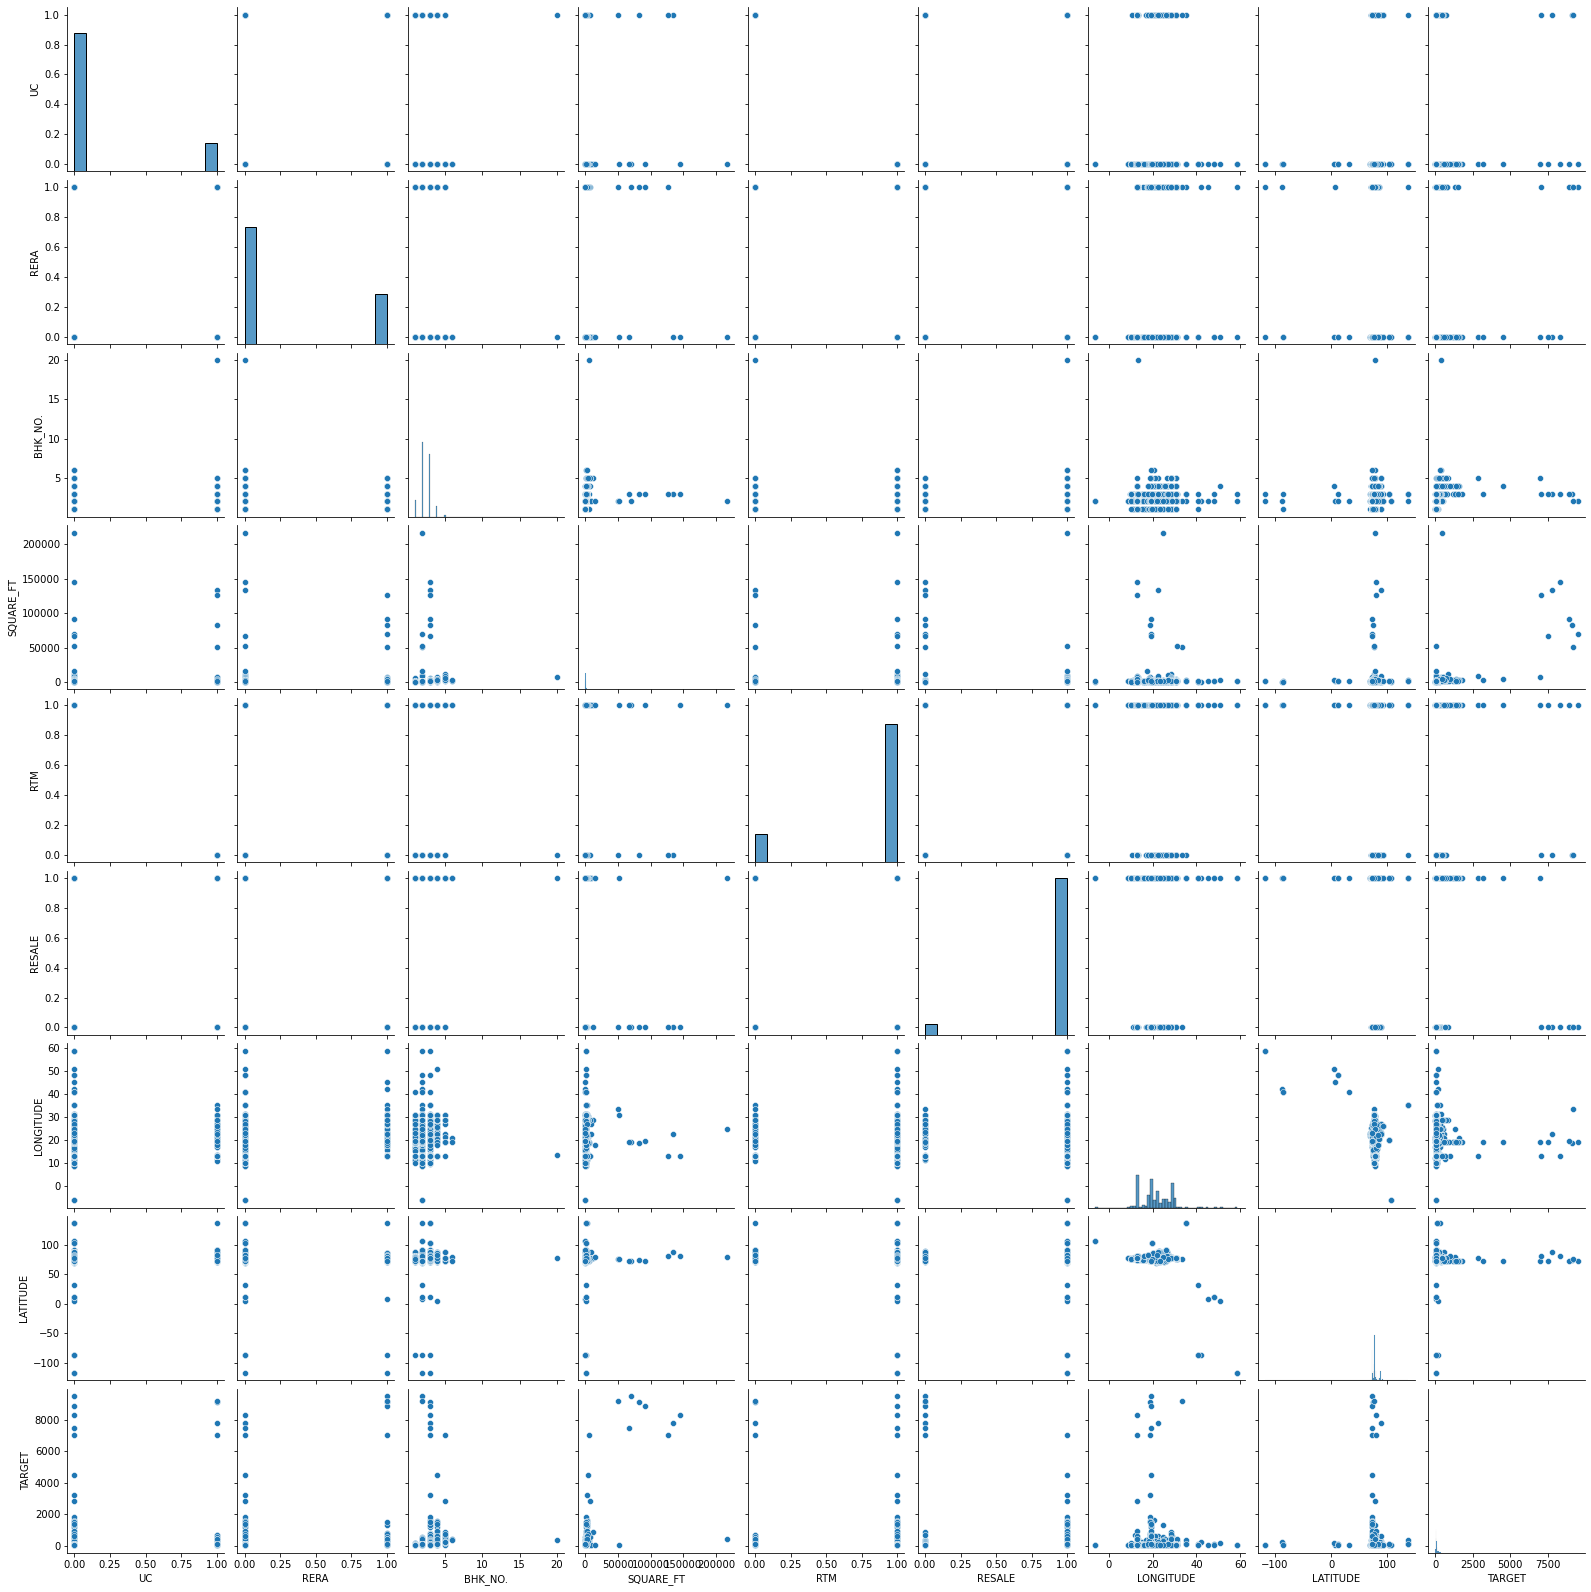

In [ ]:
sns.pairplot(data2.sample(2000))

<AxesSubplot:xlabel='SQUARE_FT'>

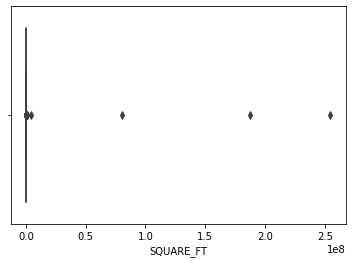

In [ ]:
sns.boxplot(x = data2["SQUARE_FT"])

<AxesSubplot:xlabel='TARGET'>

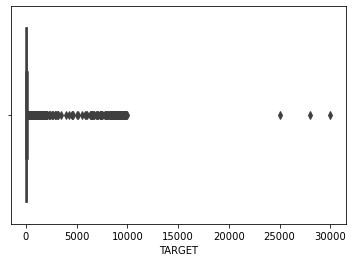

In [ ]:
sns.boxplot(x = data2["TARGET"])

In [ ]:
# so many outliers in data

## Normalising Data

In [ ]:
# area_mean = np.mean(data2["SQUARE_FT"])
# data2["SQUARE_FT"] = data2["SQUARE_FT"].apply(lambda x : x/area_mean)

# target_mean = np.mean(data2["TARGET"])
# data2["TARGET"] = data2["TARGET"].apply(lambda x: x/target_mean)

## Removing Outliers

In [ ]:
# data2 = data2[data2["TARGET"] < 0.99]
# data2 = data2[data2["SQUARE_FT"] < 0.13 ]
# data2.drop(data2.loc[data2["TARGET"] < 0.1].index , inplace = True)
# data2.drop(data2.loc[data2["SQUARE_FT"] < 0.15].index , inplace = True)
# nwe = data2[data2["Target"] < 0.99]


## Correlation of Variables

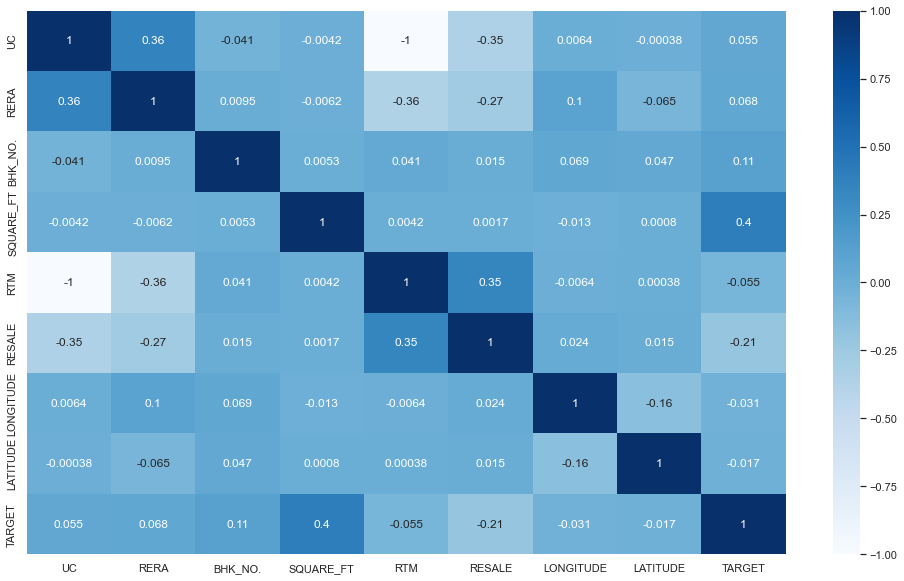

In [ ]:
plt.figure(figsize = (17, 10))
sns.set_theme(style="white")
corr = data2.corr()
heatmap = sns.heatmap(corr, annot = True, cmap = "Blues")

In [ ]:
data2.drop(['ADDRESS'], axis=1, inplace=True)

## Converting Char values to Integer

In [ ]:
data2["POSTED_BY"] = np.where(data2["POSTED_BY"] == "Owner",1,0)
data2["BHK_OR_RK"] = np.where(data2["BHK_OR_RK"] == "BHK", 1, 0)

In [ ]:
data2.head()

,POSTED_BY,UC,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RTM,RESALE,LONGITUDE,LATITUDE,TARGET
0,1,0,0,2,1,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,0,2,1,1275.000000,1,1,12.274538,76.644605,51.0
2,1,0,0,2,1,933.159722,1,1,12.778033,77.632191,43.0
3,1,0,1,2,1,929.921143,1,1,28.642300,77.344500,62.5
4,0,1,0,2,1,999.009247,0,1,22.592200,88.484911,60.5


## Dividing Dataset into Input Features and Target

In [ ]:
target =  data2["TARGET"]
data = data2.drop(["TARGET"], axis=1)

## Dividing training and test data

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.3)

In [ ]:
le = LabelEncoder()

## MODEL

In [ ]:
model = RandomForestRegressor(criterion='mae', n_jobs=1, n_estimators=10, max_depth=8, min_samples_leaf=1, random_state=3)

In [ ]:
model.fit(Xtrain, Ytrain)

RandomForestRegressor(criterion='mae', max_depth=8, n_estimators=10, n_jobs=1,
                      random_state=3)

In [ ]:
y_predicted = model.predict(Xtest)

In [ ]:
accuracy = model.score(Xtest, Ytest)

In [ ]:
MSE_score = MSE(Ytest, y_predicted)

## Accuracy

In [ ]:
print("Training Accuracy : ", model.score(Xtrain, Ytrain))
print("Testing Accurcy   : ", accuracy)
print("MSE Score         : ", MSE_score)

Training Accuracy :  0.9673950561939385
Testing Accurcy   :  0.938279112620355
MSE Score         :  24478.909600373474


In [ ]:
model_file_name = "HousePredictionModel(Final).sav"
pickle.dump(model, open(model_file_name, "wb"))